# Car price Analysis

####  DONE BY: Ezra Bett


### Data understanding
`car_ID`- Unique identifier for each car in the dataset.

`symboling`-  Symbolic representation of the risk level associated with the car. It is often used for insurance purposes, where negative values indicate higher risk.

`CarName`- Name of the car model or brand.

`fueltype`- Type of fuel the car uses (e.g., gas or diesel).

`aspiration`- Refers to whether the car has a turbocharger (turbo) or not (std).

`doornumber` - Number of doors on the car.

`carbody`- Body style of the car (e.g., sedan, hatchback, convertible).

`drivewheel`- Type of drivetrain (e.g., front-wheel drive, rear-wheel drive, 4-wheel drive).

`enginelocation`- Location of the car's engine (e.g., front or rear).

`wheelbase`- Distance between the centers of the front and rear wheels.

`carlength, carwidth, carheight`- Dimensions of the car.

`curbweight`- Weight of the car without occupants or baggage.

`enginetype`- ype of engine (e.g., ohc, ohcf, ohcv).
            - 
`cylindernumber`- Number of cylinders in the engine.

`enginesize`- Displacement of the engine.

`fuelsystem`- type of fuel injection system.

`boreratio, stroke`- Parameters related to the engine's geometry.

`compressionratio`- Ratio of the volume of the cylinder at the bottom of the piston's stroke to the volume at the top.

`horsepower`- Power of the car's engine.

`peakrpm`- The engine's speed at which it generates maximum power. 

`citympg, highwaympg`- Miles per gallon (MPG) of the car in city and highway conditions, respectively.

`price`- The price of the car.

We have three data types in our data namely: object, float64 and int64

Below we import required libraries 

In [36]:
#importing libraries and modules
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
% matplotlib inline 


UsageError: Line magic function `%` not found.


### 1. Loading car data and transforming it into a DataFrame for analysis


In [2]:
cars =  pd.read_csv("data/CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 1.1 Data understanding and data wrangling
Here we familiarize with our data and perform some preprocessing steps such as dealing with missing values, duplicates, white spaces, outliers and any other step needed.

Below we get the dataframe summary information


In [5]:
#DF info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

From the information display we can see that our data entails object, float and interger data types. This can indicate presence of categorical, continous and ordinal values within the rows of our data frame. All coumns are complete and have zero missing values.

Doing summary statistics for numerical columns in our data

In [6]:
#summary statistics
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Checking for duplicates in our columns

In [ ]:
#iterating through each column checking for duplicates
for column in cars.columns:
    duplicates = cars[column].duplicated()
    print(f"Column '{column}': {duplicates.any()} duplicates")


Column 'car_ID': False duplicates
Column 'symboling': True duplicates
Column 'CarName': True duplicates
Column 'fueltype': True duplicates
Column 'aspiration': True duplicates
Column 'doornumber': True duplicates
Column 'carbody': True duplicates
Column 'drivewheel': True duplicates
Column 'enginelocation': True duplicates
Column 'wheelbase': True duplicates
Column 'carlength': True duplicates
Column 'carwidth': True duplicates
Column 'carheight': True duplicates
Column 'curbweight': True duplicates
Column 'enginetype': True duplicates
Column 'cylindernumber': True duplicates
Column 'enginesize': True duplicates
Column 'fuelsystem': True duplicates
Column 'boreratio': True duplicates
Column 'stroke': True duplicates
Column 'compressionratio': True duplicates
Column 'horsepower': True duplicates
Column 'peakrpm': True duplicates
Column 'citympg': True duplicates
Column 'highwaympg': True duplicates
Column 'price': True duplicates


We shall not drop the duplicates because we are analyzing different models of cars made by different manufacturers. The duplicates can be accounted for by saying cars can have the same specifications although they are made independently by different car dealers. Dropping the duplicates might lead to losing a lot of data which we need for our analysis.

## 2. Exploratory Data Analysis
Here we are going to check for relationships between our columns using plots and graphs. We will also plot exploratory plots to help us further understand our data i.e Knowing which brand of cars was sold more . This analysis is also essential for our modelling stage since we will have already identify the columns that have linear relationship to our target.
### 2.1 Univariate analysis

#### 2.1.1 Looking at the distribution of each column to understand the type of distribution


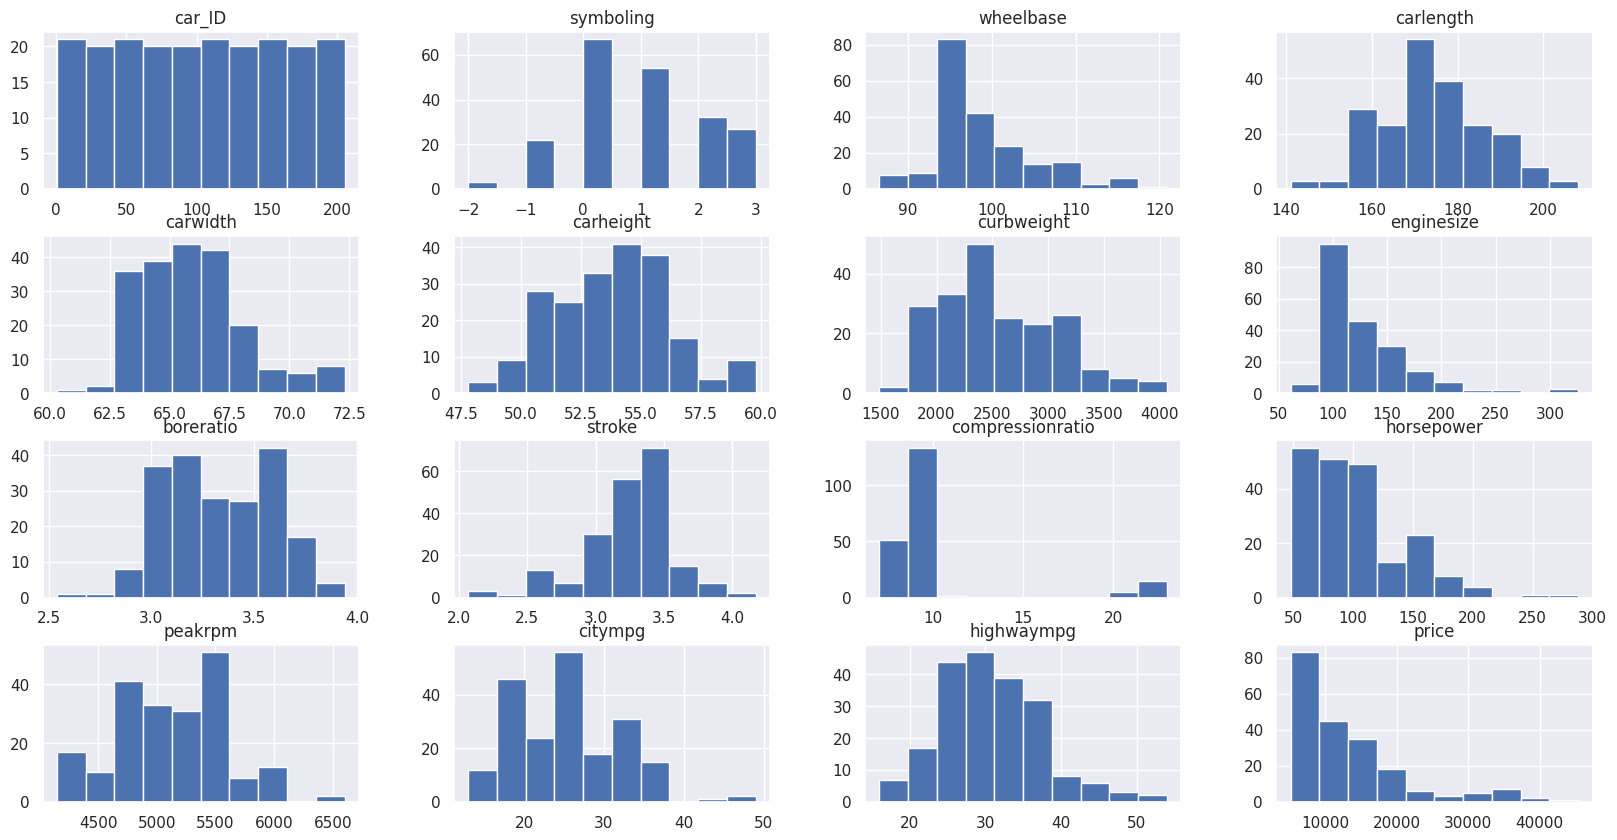

In [29]:
cars.hist(figsize=(20, 10))
plt.show();

From the above visuals we can see most columns almost follow a normal distribution. The variables that form a bell shape(or almost) curve indicates that they follow a  normal distribution. The other variables have their own unique distribution as well. Others have a positive skew while others have a negative skew.

### 2.1.2 Understanding the symboling column(scale of risk or insurance rating associated with the car)

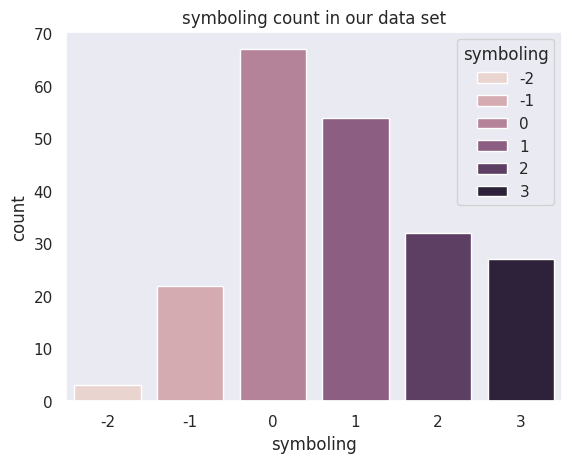

In [43]:
#visualizing symboling column
from functions import sns_xcount, sns_ycount
sns_xcount("symboling", cars)



From the symboling status that tells us the risk level associated with the car, we can see most cars have 0 risk level, few cars are prone to risks indicating a car that is perceived as riskier or more likely to be involved in accidents, leading to higher insurance premiums. And most cars have a positive scale and are considered less risky or more favorable in terms of insurance. A higher positive symboling might indicate a car that is seen as safer or less likely to be involved in accidents, leading to lower insurance premiums.
### 2.1.3 Visualizing the fuel type column

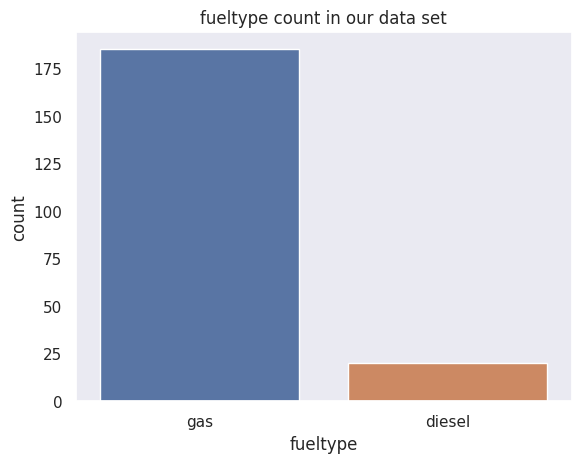

In [41]:
sns_xcount("fueltype", cars)

We have two types of fuel in our dataset. Most cars run on gas(petrol) and few cars run on diesel.
### 2.1.3 Inspecting the apiration column

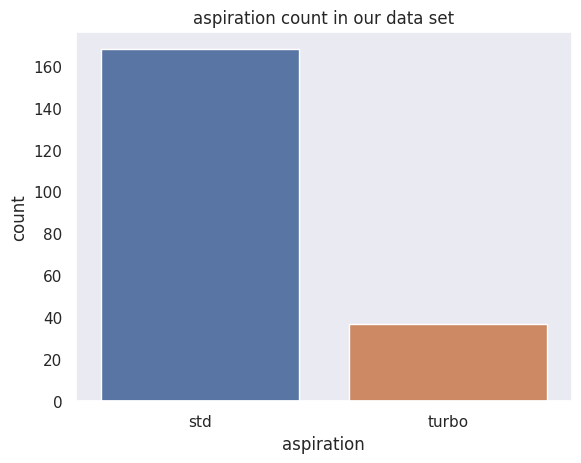

In [44]:
#plotting aspiration column
sns_xcount("aspiration", cars)

We have two aspiration categories the standard type and the turbo type. Most cars runs on engines with standard aspiration and this can indicate its pocket friendly compared to the turbo type which has low count of cars running on it.
### 2.1.4  Doornumber

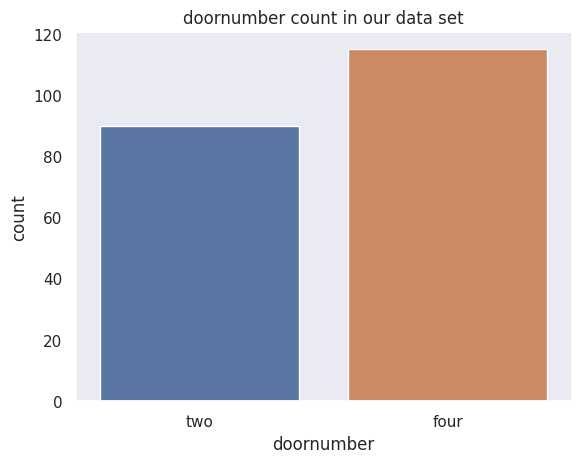

In [45]:
sns_xcount("doornumber", cars)

There are two doornumber categories. Most cars have four doors and two doors on them. The difference between the two is not that much. 
### 2.1.5 Carbody analysis

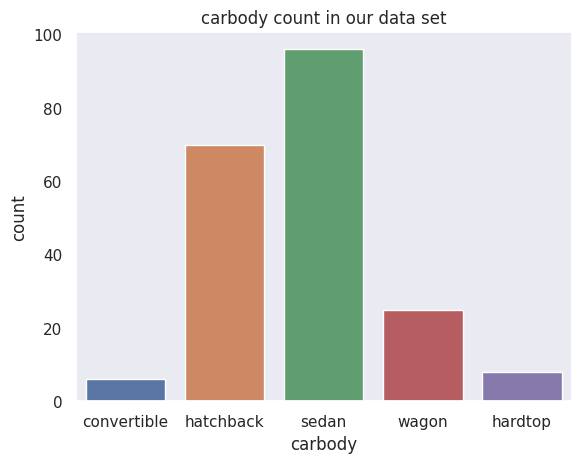

In [48]:
sns_xcount("carbody", cars)

There are 5 body styles  representing how cars are manufactured by automobiles. Sedan body type is the most style produced followed by hatchback and convertibles comes at last. This can indicate that sedan are pocket friendly and are mostly preferred by car owners. On the other hand  convertibles are less in count and can indicate it is quiet expensive to acquire and maintain one.
### 2.1.6 Drivewheel type

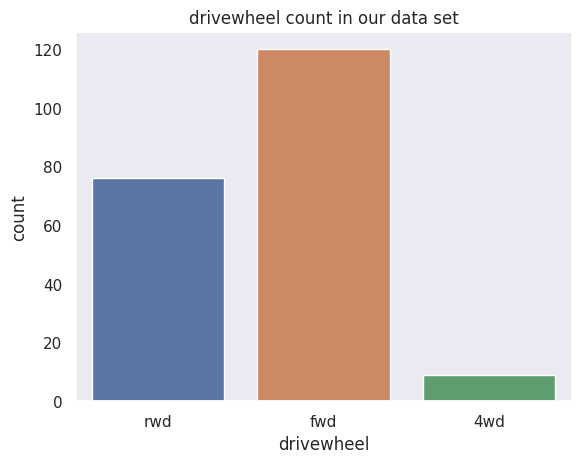

In [49]:
sns_xcount("drivewheel", cars)

Forward drivewheel has the highest count indicating it preferred by most car owners in the automobile word, rear drive comes in second and 4 wheel drive has the least count. The low count of 4 wheels may indicate it is expensive or most car owners live in towns hence do need off-road cars.
### 2.1.7 Engine location

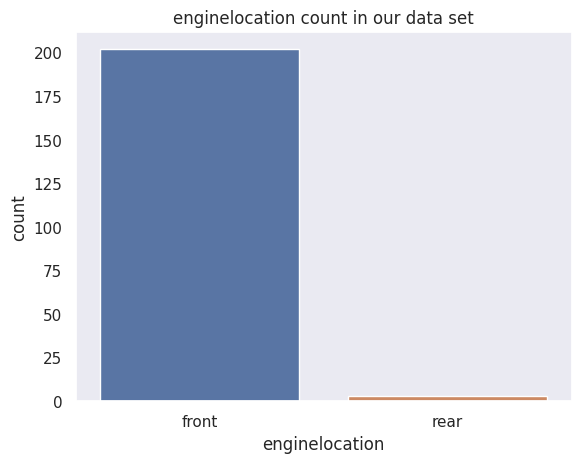

In [50]:
sns_xcount("enginelocation", cars)

In [42]:
cars.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
